<a href="https://colab.research.google.com/github/lgy112112/Fastai_LiverTumor_Segmentation_Tutorial/blob/main/fuckinglivertumorseg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import cv2
import imageio

import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from ipywidgets import *
from PIL import Image
from matplotlib.pyplot import figure
################################### KEY PACK: FASTAI ###################################
from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

# **If you want raw data from kaggle**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
!kaggle datasets download -d andrewmvd/liver-tumor-segmentation

100% 4.83G/4.84G [00:31<00:00, 212MB/s]
100% 4.84G/4.84G [00:31<00:00, 163MB/s]


In [ ]:
!unzip /content/liver-tumor-segmentation.zip

Archive:  /content/liver-tumor-segmentation.zip
  inflating: segmentations/segmentation-0.nii  
  inflating: segmentations/segmentation-1.nii  
  inflating: segmentations/segmentation-10.nii  
  inflating: segmentations/segmentation-100.nii  
  inflating: segmentations/segmentation-101.nii  
  inflating: segmentations/segmentation-102.nii  
  inflating: segmentations/segmentation-103.nii  
  inflating: segmentations/segmentation-104.nii  
  inflating: segmentations/segmentation-105.nii  
  inflating: segmentations/segmentation-106.nii  
  inflating: segmentations/segmentation-107.nii  
  inflating: segmentations/segmentation-108.nii  
  inflating: segmentations/segmentation-109.nii  
  inflating: segmentations/segmentation-11.nii  
  inflating: segmentations/segmentation-110.nii  
  inflating: segmentations/segmentation-111.nii  
  inflating: segmentations/segmentation-112.nii  
  inflating: segmentations/segmentation-113.nii  
  inflating: segmentations/segmentation-114.nii  
  inflat

In [ ]:
!rm -rf /content/drive/MyDrive/LiverTumorDataset


In [ ]:
import os

directory = '/content/segmentations'

# 列出目录中的所有条目
entries = os.listdir(directory)

# 计算条目数量
num_entries = len(entries)

print("Number of entries in the directory:", num_entries)


Number of entries in the directory: 131


In [ ]:
import os

directories = ['/content/volume_pt1', '/content/volume_pt2', '/content/volume_pt3', '/content/volume_pt4', '/content/volume_pt5']
total = 0
for directory in directories:
    # 列出目录中的所有条目
    entries = os.listdir(directory)

    # 计算条目数量
    num_entries = len(entries)
    total += num_entries
    print(f"Number of entries in {directory}:", num_entries)
    print(f"Sum:", total)


Number of entries in /content/volume_pt1: 11
Sum: 11
Number of entries in /content/volume_pt2: 10
Sum: 21
Number of entries in /content/volume_pt3: 10
Sum: 31
Number of entries in /content/volume_pt4: 10
Sum: 41
Number of entries in /content/volume_pt5: 10
Sum: 51


In [ ]:
import os

segmentation_directory = '/content/segmentations'
volume_directories = ['/content/volume_pt1', '/content/volume_pt2', '/content/volume_pt3', '/content/volume_pt4', '/content/volume_pt5']

# Sort out index
segmentation_list = sorted([os.path.join(segmentation_directory, file) for file in os.listdir(segmentation_directory)], key=lambda x: int(x.split('-')[-1].split('.')[0]))


volume_list = []
for volume_directory in volume_directories:
    volume_files = [os.path.join(volume_directory, file) for file in os.listdir(volume_directory)]
    volume_files.sort(key=lambda x: int(x.split('-')[-1].split('.')[0]))
    volume_list.extend(volume_files)

print("Sorted Segmentation List:")
print(segmentation_list)
print("\nSorted Volume List:")
print(volume_list)


Sorted Segmentation List:
['/content/segmentations/segmentation-0.nii', '/content/segmentations/segmentation-1.nii', '/content/segmentations/segmentation-2.nii', '/content/segmentations/segmentation-3.nii', '/content/segmentations/segmentation-4.nii', '/content/segmentations/segmentation-5.nii', '/content/segmentations/segmentation-6.nii', '/content/segmentations/segmentation-7.nii', '/content/segmentations/segmentation-8.nii', '/content/segmentations/segmentation-9.nii', '/content/segmentations/segmentation-10.nii', '/content/segmentations/segmentation-11.nii', '/content/segmentations/segmentation-12.nii', '/content/segmentations/segmentation-13.nii', '/content/segmentations/segmentation-14.nii', '/content/segmentations/segmentation-15.nii', '/content/segmentations/segmentation-16.nii', '/content/segmentations/segmentation-17.nii', '/content/segmentations/segmentation-18.nii', '/content/segmentations/segmentation-19.nii', '/content/segmentations/segmentation-20.nii', '/content/segment

In [ ]:
segmentation_list = segmentation_list[0:51]

In [ ]:
segmentation_list, volume_list

(['/content/segmentations/segmentation-0.nii',
  '/content/segmentations/segmentation-1.nii',
  '/content/segmentations/segmentation-2.nii',
  '/content/segmentations/segmentation-3.nii',
  '/content/segmentations/segmentation-4.nii',
  '/content/segmentations/segmentation-5.nii',
  '/content/segmentations/segmentation-6.nii',
  '/content/segmentations/segmentation-7.nii',
  '/content/segmentations/segmentation-8.nii',
  '/content/segmentations/segmentation-9.nii',
  '/content/segmentations/segmentation-10.nii',
  '/content/segmentations/segmentation-11.nii',
  '/content/segmentations/segmentation-12.nii',
  '/content/segmentations/segmentation-13.nii',
  '/content/segmentations/segmentation-14.nii',
  '/content/segmentations/segmentation-15.nii',
  '/content/segmentations/segmentation-16.nii',
  '/content/segmentations/segmentation-17.nii',
  '/content/segmentations/segmentation-18.nii',
  '/content/segmentations/segmentation-19.nii',
  '/content/segmentations/segmentation-20.nii',
  

In [ ]:
import nibabel as nib
import numpy as np

def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array) #NOTICE: An Array is returned to view info

In [ ]:

sample_index = 50
sample_ct = read_nii(volume_list[sample_index])
sample_mask = read_nii(segmentation_list[sample_index])

sample_ct.shape, sample_mask.shape

((512, 512, 240), (512, 512, 240))

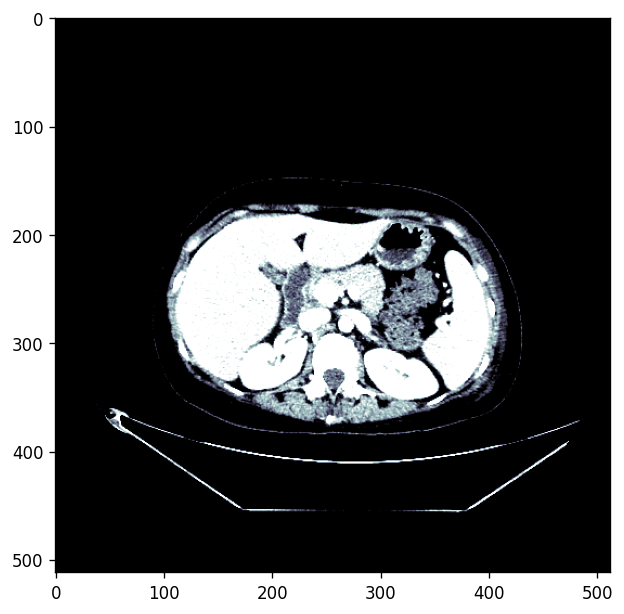

In [ ]:
# Preprocess the nii file
# Source https://docs.fast.ai/medical.imaging.html

dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)

@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min) #Normalization

figure(figsize=(8, 6), dpi=120)

plt.imshow(tensor(sample_ct[..., 120].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [ ]:
import matplotlib.pyplot as plt

def plot_sample(array_list, color_map='nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(16, 12), dpi=100)

    plt.subplot(2, 2, 1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


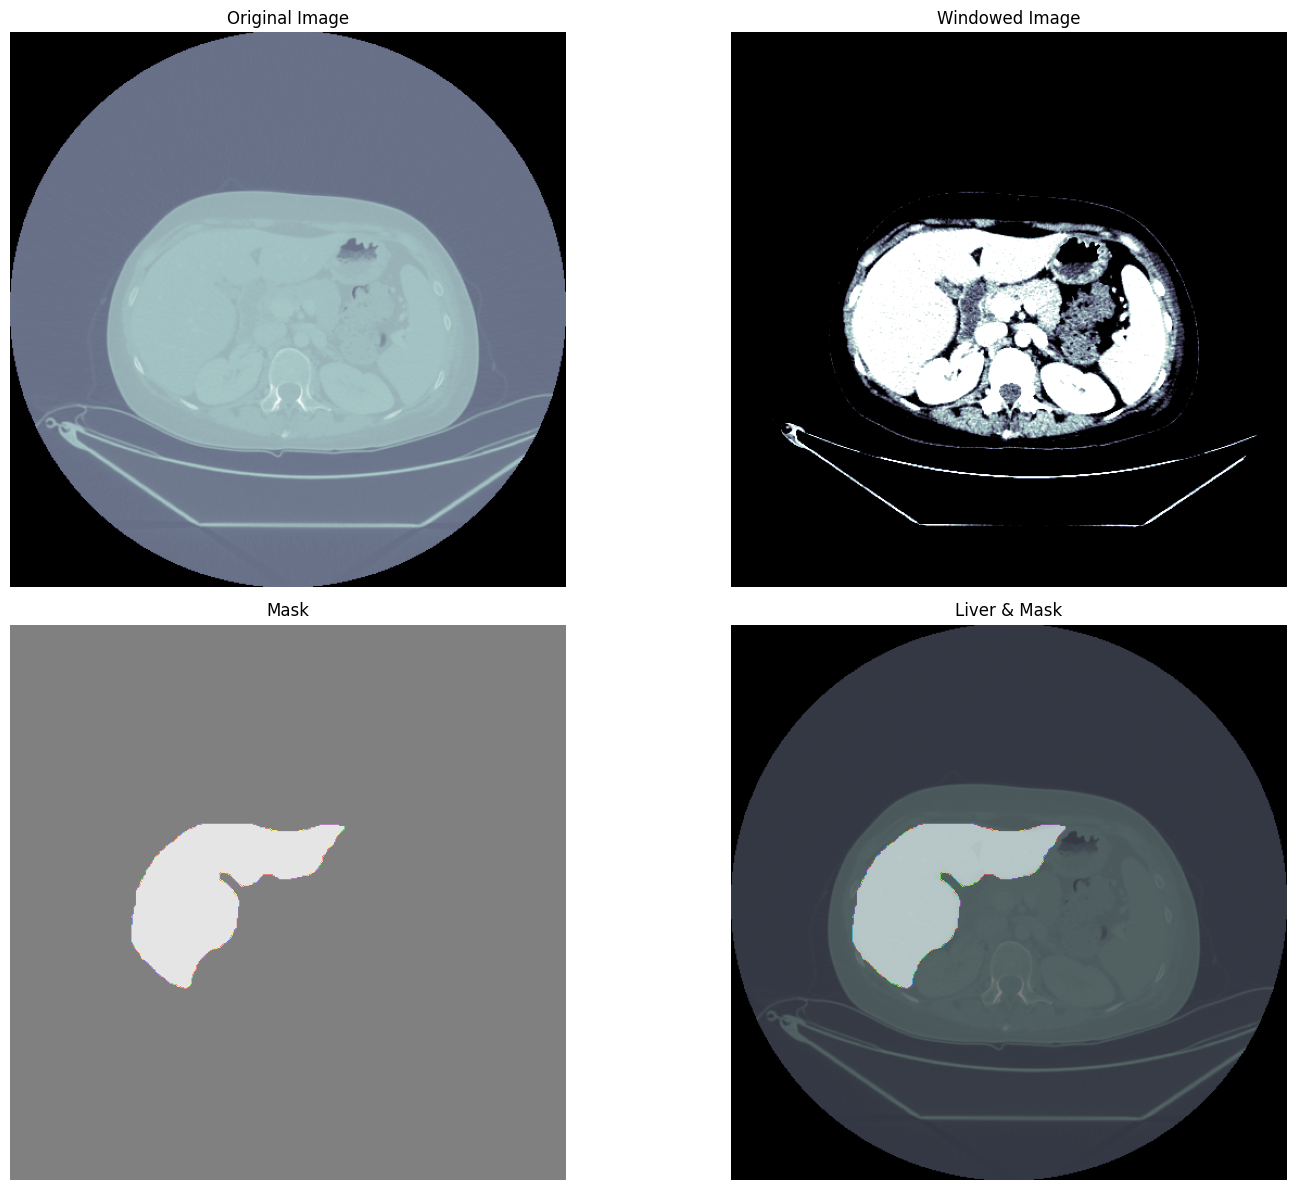

In [ ]:
sample = 120

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

In [ ]:
# Check the mask values
mask = Image.fromarray(sample_mask[...,sample].astype('uint8'), mode="L") #uint8 to shift format right
unique, counts = np.unique(mask, return_counts=True)
print(np.array((unique, counts)).T)

[[     0 247572]
 [     1  14572]]


<Axes: >

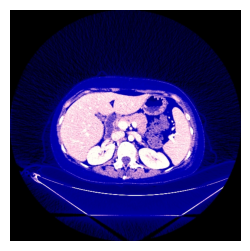

In [ ]:
# Preprocessing functions
# Source https://docs.fast.ai/medical.imaging

class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'}

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()

@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)


@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=120):
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs = subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver, dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0], figsize=(8, 6))

In [ ]:
length = len(volume_list)

for ii in tqdm(range(0,length,3)):
  print(volume_list[ii])



  0%|          | 0/17 [00:00<?, ?it/s]

/content/volume_pt1/volume-0.nii
/content/volume_pt1/volume-3.nii
/content/volume_pt1/volume-6.nii
/content/volume_pt1/volume-9.nii
/content/volume_pt2/volume-12.nii
/content/volume_pt2/volume-15.nii
/content/volume_pt2/volume-18.nii
/content/volume_pt3/volume-21.nii
/content/volume_pt3/volume-24.nii
/content/volume_pt3/volume-27.nii
/content/volume_pt3/volume-30.nii
/content/volume_pt4/volume-33.nii
/content/volume_pt4/volume-36.nii
/content/volume_pt4/volume-39.nii
/content/volume_pt5/volume-42.nii
/content/volume_pt5/volume-45.nii
/content/volume_pt5/volume-48.nii


In [ ]:
length = len(segmentation_list)

for ii in tqdm(range(0,length,3)):
  print(segmentation_list[ii])

  0%|          | 0/17 [00:00<?, ?it/s]

/content/segmentations/segmentation-0.nii
/content/segmentations/segmentation-3.nii
/content/segmentations/segmentation-6.nii
/content/segmentations/segmentation-9.nii
/content/segmentations/segmentation-12.nii
/content/segmentations/segmentation-15.nii
/content/segmentations/segmentation-18.nii
/content/segmentations/segmentation-21.nii
/content/segmentations/segmentation-24.nii
/content/segmentations/segmentation-27.nii
/content/segmentations/segmentation-30.nii
/content/segmentations/segmentation-33.nii
/content/segmentations/segmentation-36.nii
/content/segmentations/segmentation-39.nii
/content/segmentations/segmentation-42.nii
/content/segmentations/segmentation-45.nii
/content/segmentations/segmentation-48.nii


In [ ]:
from PIL import Image
from pathlib import Path
import os

GENERATE_JPG_FILES = True

if GENERATE_JPG_FILES:

    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    for ii in tqdm(range(0, len(volume_list), 3)): # take 1/3 of the files for training
        curr_ct = read_nii(volume_list[ii])
        curr_mask = read_nii(segmentation_list[ii])
        curr_file_name = os.path.splitext(os.path.basename(volume_list[ii]))[0]
        curr_dim = curr_ct.shape[2] # 512, 512, curr_dim

        for curr_slice in range(0, curr_dim, 2): # export every 2nd slice for training
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")


In [ ]:
import os

directory1 = '/content/train_images'
directory2 = '/content/train_masks'
# 列出目录中的所有条目
entries1 = os.listdir(directory1)
entries2 = os.listdir(directory2)

# 计算条目数量
num_entries1 = len(entries1)
num_entries2 = len(entries2)

print(f"Number of entries in the {directory1}:", num_entries1)
print(f"Number of entries in the {directory2}:", num_entries2)

In [ ]:
# prompt: 将/content/train_images和/content/train_masks复制到/content/drive/MyDrive里，如果已存在这两个文件夹则不复制

!cp -r /content/train_images /content/drive/MyDrive
!cp -r /content/train_masks /content/drive/MyDrive


# **Start up here if have fined data**

In [ ]:
############################### just ignore creating this list. doing with that 2 directories is just fine #############################

import os
from tqdm import tqdm
# after preprocessed, you can use /content/drive/MyDrive/train_images so you won't startup agian
if os.path.exists('/content/drive/MyDrive/train_images'):
  image_dir = '/content/drive/MyDrive/train_images'
else:
  image_dir = '/content/train_images'

if os.path.exists('/content/drive/MyDrive/train_masks'):
  mask_dir = '/content/drive/MyDrive/train_masks'
else:
  mask_dir = '/content/train_masks'

image_files = sorted([os.path.join(image_dir, file) for file in os.listdir(image_dir)])
mask_files = sorted([os.path.join(mask_dir, file) for file in os.listdir(mask_dir)])

img_pair_list = []

for jpg_file in tqdm(image_files, desc="Checking masks"):
    jpg_filename = os.path.basename(jpg_file)
    jpg_basename = os.path.splitext(jpg_filename)[0]
    corresponding_mask = os.path.join(mask_dir, jpg_basename + "_mask.png")

    if corresponding_mask in mask_files:
        img_pair_list.append([jpg_file, corresponding_mask])

print("Number of image pairs found:", len(img_pair_list))


Checking masks: 100%|██████████| 3037/3037 [00:00<00:00, 38390.32it/s]

Number of image pairs found: 3037


In [ ]:
import random
random_index = random.randint(0, len(img_pair_list))


img_pair_list[random_index]

['/content/drive/MyDrive/train_images/volume-48_slice_102.jpg',
 '/content/drive/MyDrive/train_masks/volume-48_slice_102_mask.png']

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def view_img_pair(index):
    pair = img_pair_list[index]
    image_path = pair[0]
    mask_path = pair[1]

    image = Image.open(image_path)
    mask = Image.open(mask_path)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    plt.show()
    print(image.shape)
    print(mask.shape)
    print(image.mode)
    print(mask.mode)


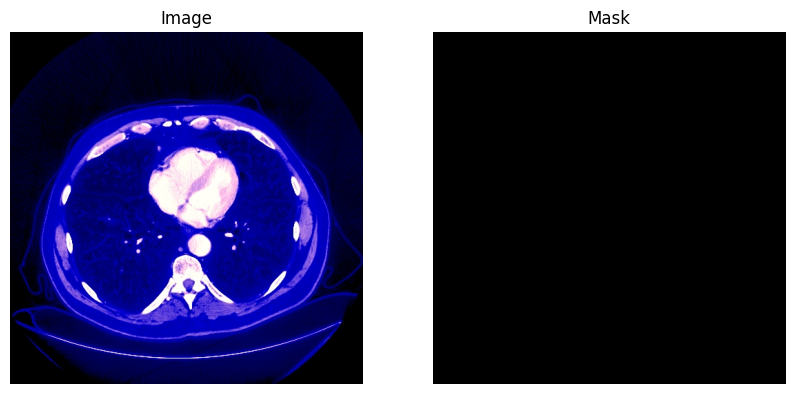

(512, 512)
(512, 512)
RGB
L
[[     0 262144]]
1882


In [ ]:
random_index = random.randint(0, len(img_pair_list))

view_img_pair(random_index) #2198
unique, counts = np.unique(array(Image.open(img_pair_list[random_index][1])), return_counts=True)
print(np.array((unique, counts)).T)
print(random_index)

In [ ]:
import numpy as np
unique, counts = np.unique(array(Image.open(img_pair_list[1246][1])), return_counts=True)

print( np.array((unique, counts)).T)

[[     0 262144]]


In [ ]:
# !git clone https://github.com/milesial/Pytorch-UNet.git

If you want to split test set, run cell below.

In [ ]:
# import os
# import random
# import shutil

# train_images_dir = '/content/drive/MyDrive/train_images'
# train_masks_dir = '/content/drive/MyDrive/train_masks'
# test_images_dir = '/content/drive/MyDrive/test_images'
# test_masks_dir = '/content/drive/MyDrive/test_masks'
# num_test_samples = 50  # Number of images to move into the test set

# # Create the test directories if they don't exist
# os.makedirs(test_images_dir, exist_ok=True)
# os.makedirs(test_masks_dir, exist_ok=True)

# # Get a list of all .jpg files in the training images directory
# jpg_filenames = [f for f in os.listdir(train_images_dir) if f.endswith('.jpg')]

# # Randomly select the desired number of files
# selected_jpg_filenames = random.sample(jpg_filenames, num_test_samples)

# # Move selected images and their masks to the test directories
# for jpg_filename in selected_jpg_filenames:
#     mask_filename = jpg_filename[:-4] + '_mask.png'  # Construct mask filename

#     # Move the .jpg file
#     shutil.move(os.path.join(train_images_dir, jpg_filename),
#                 os.path.join(test_images_dir, jpg_filename))

#     # Move the .png mask file
#     shutil.move(os.path.join(train_masks_dir, mask_filename),
#                 os.path.join(test_masks_dir, mask_filename))


In [ ]:
train_images_dir = '/content/drive/MyDrive/train_images'
num_files = len(os.listdir(train_images_dir))
print(f"Number of files in {train_images_dir}: {num_files}")


Number of files in /content/drive/MyDrive/train_images: 3037


In [ ]:
from pathlib import Path

path = Path('/content/drive/MyDrive')

def get_x(fname:Path): return fname
def label_func(x): return path/'train_masks'/f'{x.stem}_mask.png'

In [ ]:
BATCH_SIZE = 16
IMAGE_SIZE = 128

codes = np.array(["background","liver","tumor"])


tfms = [IntToFloatTensor(),Normalize(), *aug_transforms(mult=2.0, do_flip=True,
      flip_vert=False, max_rotate=30., max_zoom=1.1), Normalize.from_stats(*imagenet_stats)]

db = DataBlock(blocks=(ImageBlock(),MaskBlock(codes)),  #codes = {"Backround": 0,"Liver": 1,"Tumor": 2}
               batch_tfms=tfms,
               splitter=RandomSplitter(valid_pct=0.1),
               item_tfms=[Resize(IMAGE_SIZE)],
               get_items=get_image_files,
               get_y=label_func)

ds = db.datasets(source=path/'train_images')

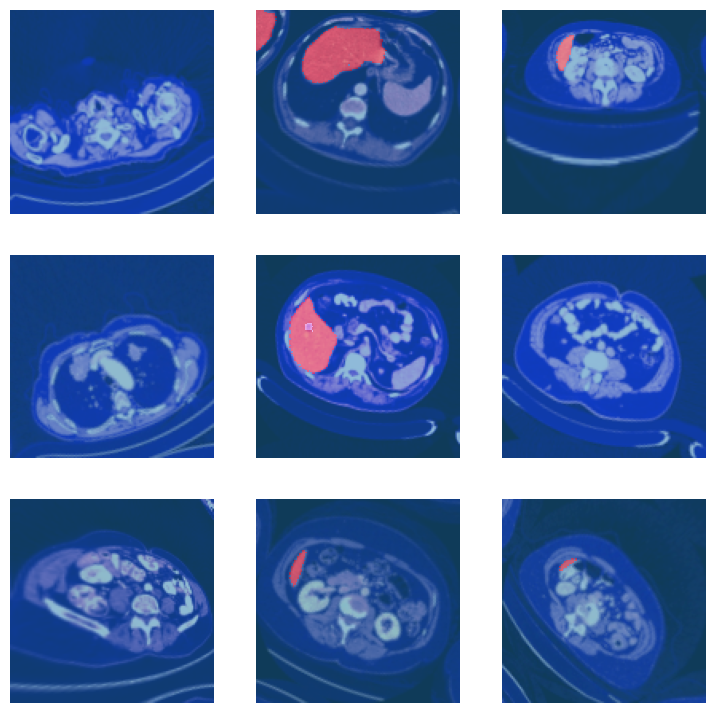

In [ ]:
dls = db.dataloaders(path/'train_images', bs = BATCH_SIZE) #, num_workers=0
dls.show_batch()

In [ ]:
from fastai.metrics import *
from fastai.optimizer import *
from fastai.callback.core import *

In [ ]:
class CustomDiceMulti(Metric):
    "Averaged Dice metric (Macro F1) for multiclass target in segmentation"
    def __init__(self, axis=1, class_index=None):
      self.axis = axis
      self.class_index = class_index
    def reset(self): self.inter,self.union = {},{}
    def accumulate(self, learn):
        pred,targ = flatten_check(learn.pred.argmax(dim=self.axis), learn.y)
        for c in range(learn.pred.shape[self.axis]):
            p = torch.where(pred == c, 1, 0)
            t = torch.where(targ == c, 1, 0)
            c_inter = (p*t).float().sum().item()
            c_union = (p+t).float().sum().item()
            if c in self.inter:
                self.inter[c] += c_inter
                self.union[c] += c_union
            else:
                self.inter[c] = c_inter
                self.union[c] = c_union
    @property
    def value(self):
        # Get intermediate calculations
        inter, union = self.get_inter_union()

        if self.class_index is not None:
            # Calculate and return for the specified class
            return 2 * inter[self.class_index] / union[self.class_index] if union[self.class_index] > 0 else np.nan
        else:
            # Calculate mean across classes
            binary_dice_scores = np.array([])
            for c in inter:
                binary_dice_scores = np.append(binary_dice_scores, 2 * inter[c] / union[c] if union[c] > 0 else np.nan)
            return np.nanmean(binary_dice_scores)

    def get_inter_union(self):
        """Returns the intersection and union counts for each class."""
        return self.inter, self.union

# class JaccardCoeffMultiClassWise(CustomDiceMulti):
#     "Averaged Jaccard coefficient metric (mIoU) for multiclass target in segmentation"
#     def __init__(self, class_index):
#         super().__init__(class_index)  # Inherit from DiceMulti
#         # self.class_index = class_index
#     property
#     def value(self, class_index=None):
#         inter, union = self.get_inter_union()  # Get intermediate calculations
#         if class_index is not None:
#             return 2 * inter[class_index] / union[class_index] if union[class_index] > 0 else np.nan
#         else:  # Calculate the mean IoU
#             binary_jaccard_scores = np.array([])
#             for c in inter:
#                 binary_jaccard_scores = np.append(binary_jaccard_scores, inter[c] / (union[c] - inter[c]) if union[c] > 0 else np.nan)
#             return np.nanmean(binary_jaccard_scores)

# JaccardLiver = JaccardCoeffMultiClassWise(class_index=1)
# JaccardTumor = JaccardCoeffMultiClassWise(class_index=2)

In [ ]:
def foreground_acc(inp, targ, bkg_idx=0, axis=1):  # exclude a background from metric
    "Computes non-background accuracy for multiclass segmentation"
    targ = targ.squeeze(1)
    mask = targ != bkg_idx
    return (inp.argmax(dim=axis)[mask]==targ[mask]).float().mean()

def cust_foreground_acc(inp, targ):  # # include a background into the metric
    return foreground_acc(inp=inp, targ=targ, bkg_idx=3, axis=1) # 3 is a dummy value to include the background which is 0

class ClasswiseDiceMulti(Metric):
    "Averaged Dice metric (Macro F1) for multiclass target in segmentation"
    def __init__(self, axis=1): self.axis = axis
    def reset(self): self.inter,self.union = {},{}
    def accumulate(self, learn):
        pred,targ = flatten_check(learn.pred.argmax(dim=self.axis), learn.y)
        for c in range(learn.pred.shape[self.axis]):
            p = torch.where(pred == c, 1, 0)
            t = torch.where(targ == c, 1, 0)
            c_inter = (p*t).float().sum().item()
            c_union = (p+t).float().sum().item()
            if c in self.inter:
                self.inter[c] += c_inter
                self.union[c] += c_union
            else:
                self.inter[c] = c_inter
                self.union[c] = c_union

    @property
    def value(self):
        binary_dice_scores = np.array([])
        for c in self.inter:
            binary_dice_scores = np.append(binary_dice_scores, 2.*self.inter[c]/self.union[c] if self.union[c] > 0 else np.nan)
        return binary_dice_scores


class ClasswiseJaccardCoeffMulti(DiceMulti):
    "Averaged Jaccard coefficient metric (mIoU) for multiclass target in segmentation"
    @property
    def value(self):
        binary_jaccard_scores = np.array([])
        for c in self.inter:
            binary_jaccard_scores = np.append(binary_jaccard_scores, self.inter[c]/(self.union[c]-self.inter[c]) if self.union[c] > 0 else np.nan)
        return binary_jaccard_scores
############################# TO DO -----> DROPOUT ########################
learn = unet_learner(          dls,
                     resnet50,
                     loss_func=FocalLossFlat(axis=1, gamma=3.5), # while not using simply CEL https://docs.fast.ai/losses.html
                     metrics=[JaccardCoeffMulti, DiceMulti(),
                          foreground_acc, cust_foreground_acc],)
                    #  cbs=ClasswiseMetricsCallback()) # return average
                    # https://github.com/fastai/fastai/blob/master/fastai/metrics.py#L16

# learn_test = unet_learner(          dls,
#                      resnet50,
#                      loss_func=FocalLossFlat(axis=1, gamma=3.5), # while not using simply CEL https://docs.fast.ai/losses.html
#                      metrics=[JaccardLiver, JaccardTumor, DiceMulti(), foreground_acc, cust_foreground_acc],)
#                     #  cbs=ClasswiseMetricsCallback()) # return average
#                      # https://github.com/fastai/fastai/blob/master/fastai/metrics.py#L16

In [ ]:
xb, yb = dls.one_batch()
print(xb.shape, yb.shape)

torch.Size([16, 3, 128, 128]) torch.Size([16, 128, 128])


In [ ]:
learn.summary()

/usr/local/lib/python3.10/dist-packages/fastai/metrics.py:390: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_jaccard_scores)


DynamicUnet (Input shape: 16 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     16 x 256 x 32 x 32  
Conv2d                                    16384      False     
BatchNorm2d                       

In [ ]:
learn.fine_tune(20, wd=0.01)

epoch,train_loss,valid_loss,jaccard_coeff_multi,dice_multi,foreground_acc,cust_foreground_acc,time
0,0.007988,0.005802,0.535537,[0.99415373 0.76408517 0. ],0.656597,0.988382,09:44


epoch,train_loss,valid_loss,jaccard_coeff_multi,dice_multi,foreground_acc,cust_foreground_acc,time
0,0.004234,0.003575,0.576591,[0.995742 0.84941958 0. ],0.863001,0.991371,03:31
1,0.003476,0.002858,0.678385,[0.99693006 0.88744938 0.3917724 ],0.893211,0.993648,03:31


KeyboardInterrupt: 

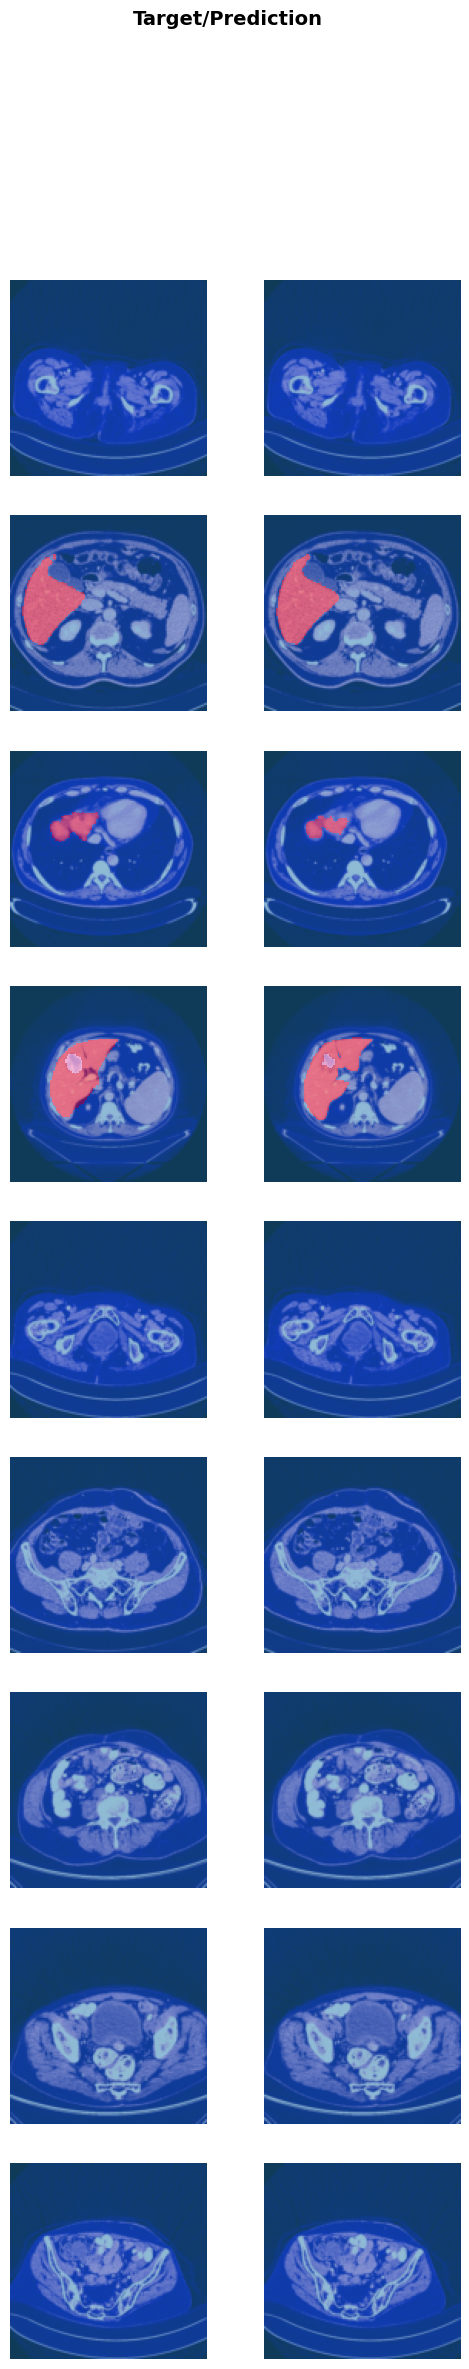

In [ ]:
learn.show_results()

In [ ]:
learn.export('/content/drive/MyDrive/LiTs_FocalLossFlat_Gamma3.5_Epo20_Excellent_Adopt_V100')


In [ ]:
# tfms = [Resize(IMAGE_SIZE),IntToFloatTensor(),Normalize()]
learn0 = load_learner('/content/drive/MyDrive/LiTs_FocalLossFlat_Gamma3.5_Epo20_Excellent_Adopt_V100',cpu=False)
learn0.dls = dls


In [ ]:
learn0.metrics.append([ClasswiseDiceMulti(), ClasswiseJaccardCoeffMulti()])

In [ ]:
learn0.fine_tune(20, freeze_epochs=2)  # Train for 5 epochs, with initial 2 epochs frozen


epoch,train_loss,valid_loss,jaccard_coeff_multi,dice_multi,foreground_acc,cust_foreground_acc,time
0,0.000871,0.001160,0.752883,0.831252,0.969328,0.996684,01:30
1,0.001884,0.001507,0.729758,0.809984,0.878931,0.996375,01:06


epoch,train_loss,valid_loss,jaccard_coeff_multi,dice_multi,foreground_acc,cust_foreground_acc,time
0,0.001042,0.000844,0.822251,0.890073,0.949771,0.997785,01:08
1,0.000888,0.000794,0.828450,0.894946,0.931754,0.997866,01:08
2,0.000922,0.000771,0.819483,0.886957,0.947656,0.998004,01:08
3,0.001006,0.000810,0.836216,0.901383,0.950442,0.997734,01:08
4,0.000891,0.000886,0.811009,0.881658,0.957095,0.997527,01:08
5,0.000950,0.000966,0.773921,0.849266,0.937916,0.997276,01:08
6,0.000926,0.000872,0.808513,0.878626,0.928694,0.997785,01:08
7,0.000945,0.000950,0.828205,0.895956,0.966007,0.997419,01:08
8,0.000774,0.000701,0.839264,0.902633,0.938145,0.998106,01:08
9,0.000764,0.000669,0.827252,0.892820,0.947294,0.998119,01:08


In [ ]:
learn0.export('/content/drive/MyDrive/Continue_Normal_V100')


In [ ]:
test_files = '/content/drive/MyDrive/test_images/volume-27_slice_496.jpg'
test_dl = learn0.dls.test_dl(test_files) # hot init ---> learn0
preds, y = learn0.get_preds(dl=test_dl)

/usr/local/lib/python3.10/dist-packages/fastai/metrics.py:390: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_jaccard_scores)
/usr/local/lib/python3.10/dist-packages/fastai/metrics.py:373: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_dice_scores)


In [ ]:
predicted_mask = np.argmax(preds, axis=1)
plt.imshow(predicted_mask[0])
plt.show()

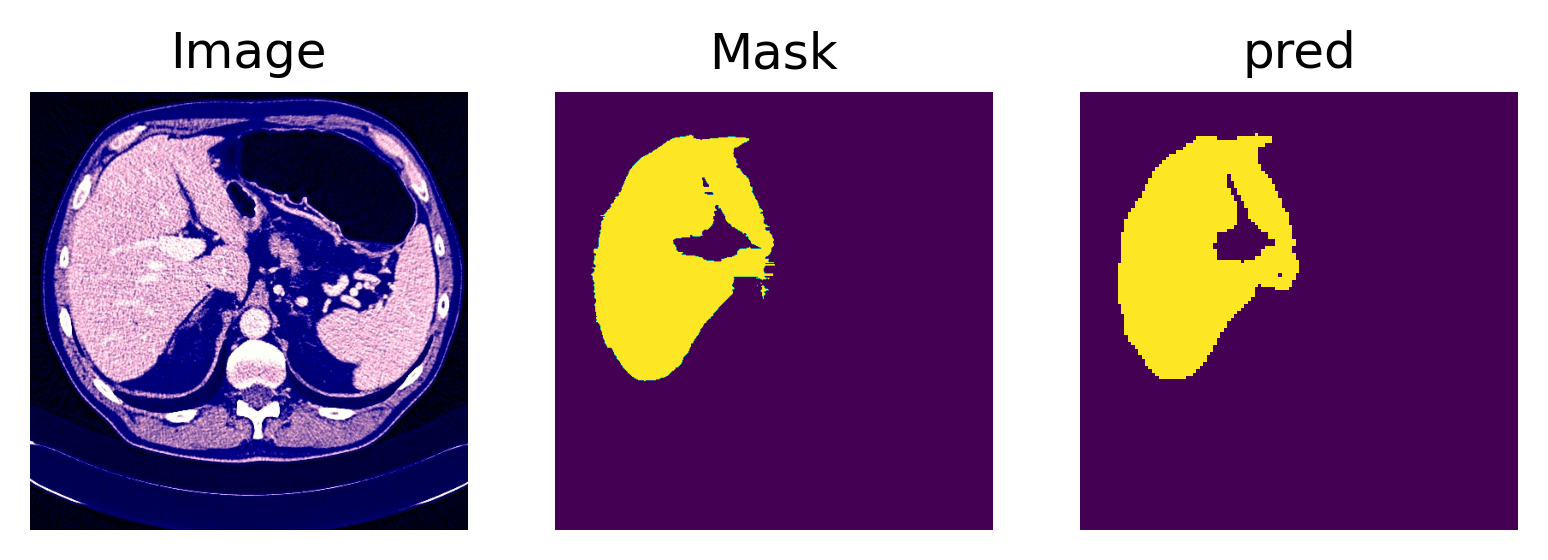

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

img_folder = "/content/drive/MyDrive/test_images/"
mask_folder = "/content/drive/MyDrive/test_masks/"

img_files = [f for f in os.listdir(img_folder) if f.endswith(".jpg")]

img_file = 'volume-3_slice_416.jpg' # volume-6_slice_444.jpg volume-9_slice_404.jpg volume-9_slice_404.jpg volume-3_slice_416.jpg

mask_file = img_file[:-4] + "_mask.png"

img_path = os.path.join(img_folder, img_file)
mask_path = os.path.join(mask_folder, mask_file)

img = Image.open(img_path)
mask = Image.open(mask_path)

test_file = img_path
test_dl = learn0.dls.test_dl(test_file) # hot initia ---> learn0
preds, y = learn0.get_preds(dl=test_dl)
predicted_mask = np.argmax(preds, axis=1)

plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.title("Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask[0])
plt.title("pred")
plt.axis('off')

plt.show()


In [ ]:
print(img_file)

volume-3_slice_416.jpg


In [ ]:
from fastai.vision.all import *

dls = ImageDataLoaders.from_folder(untar_data(URLs.MNIST), valid_pct=0.2)

learn = cnn_learner(dls, resnet18, loss_func=FocalLossFlat())

xb, yb = dls.one_batch()
print(xb.shape, yb.shape)

learn.fit_one_cycle(5, 1e-3)

learn.validate()

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 138MB/s]


torch.Size([64, 3, 28, 28]) torch.Size([64])


epoch,train_loss,valid_loss,time
0,0.331369,0.174057,00:25
1,0.092238,0.052030,00:23
2,0.064614,0.033798,00:24
3,0.041399,0.027754,00:24
4,0.040129,0.026181,00:24


(#1) [0.026181209832429886]